In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
dt = pd.read_csv('/content/drive/MyDrive/Datasets/car_data_250.csv')
dt.head()

,Car ID,Brand,Model,Year,Price,Mileage,Fuel Type,Horsepower
0,1,Tesla,Convertible,2015,63061.53,26.60,Diesel,525
1,2,Audi,Coupe,2018,28953.41,38.51,Electric,309
2,3,Audi,SUV,2013,58224.64,25.45,Diesel,403
3,4,Toyota,Truck,2015,47372.63,33.54,Hybrid,395
4,5,Toyota,Coupe,2014,63283.62,17.41,Hybrid,196


# **Histogram Analysis**

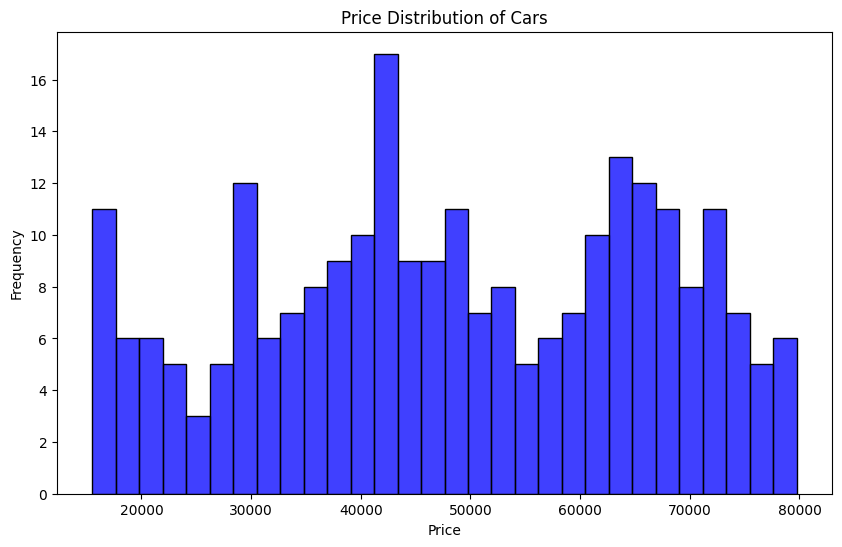

The most common price range is: (41213.434, 43354.746]


In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(dt['Price'], bins=30, kde=False, color='blue')
plt.title('Price Distribution of Cars')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
price_range = pd.cut(dt['Price'], bins=30)
most_common_range = price_range.value_counts().idxmax()
print(f"The most common price range is: {most_common_range}")

# **Scatter Analysis**

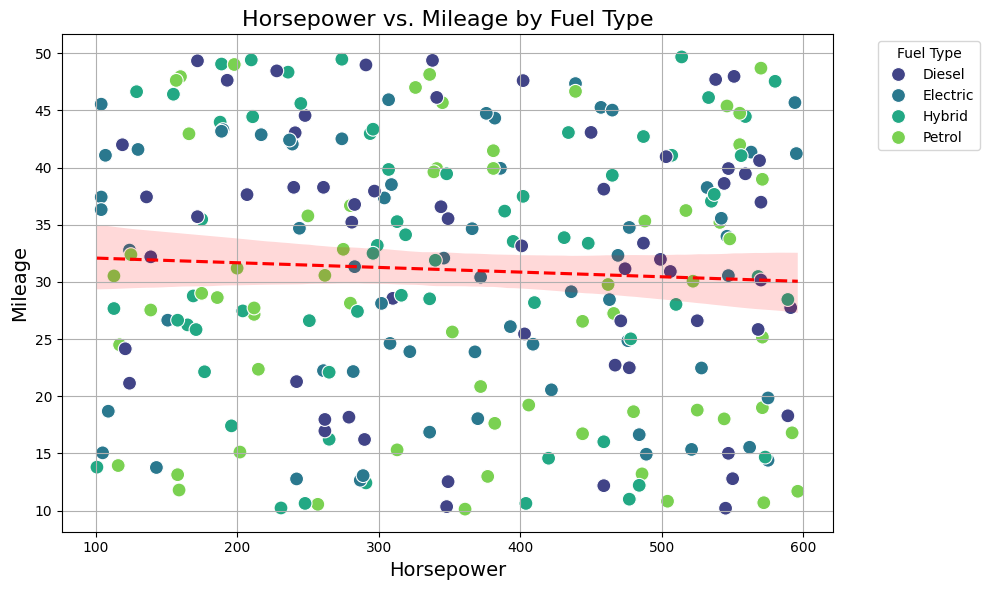

In [ ]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Horsepower', y='Mileage', hue='Fuel Type', data=dt, palette='viridis', s=100)
sns.regplot(x='Horsepower', y='Mileage', data=dt, scatter=False, color='red', line_kws={'linestyle': '--'})
plt.title('Horsepower vs. Mileage by Fuel Type', fontsize=16)
plt.xlabel('Horsepower', fontsize=14)
plt.ylabel('Mileage', fontsize=14)
plt.grid(True)

plt.legend(title='Fuel Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# **Bar Chart Visualization**

<ipython-input-20-fb0a2ad4b1c7>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')


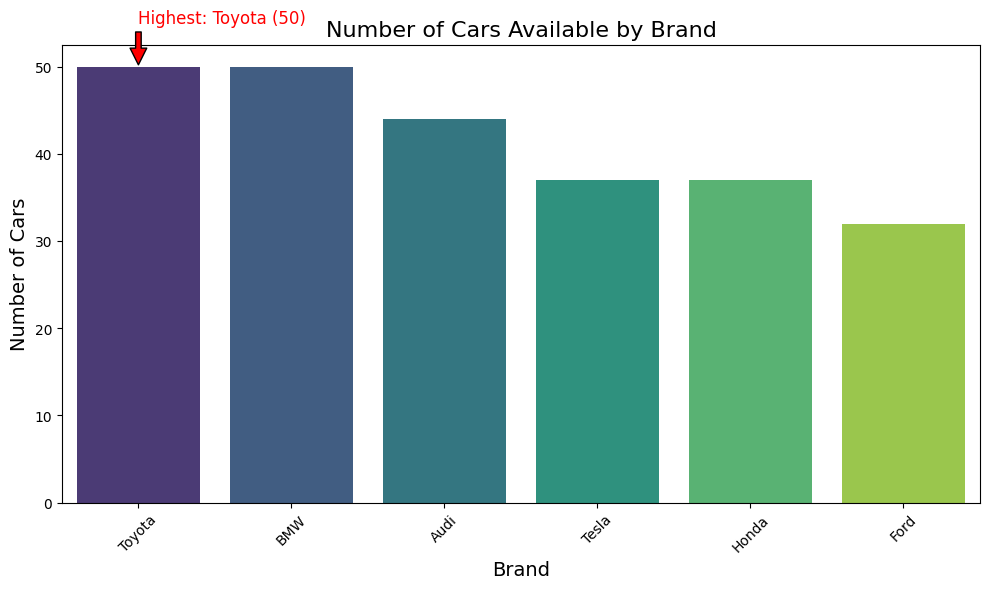

The brand with the highest number of cars is: Toyota with 50 cars.


In [ ]:
brand_counts = dt['Brand'].value_counts()

plt.figure(figsize=(10, 6))
sns.barplot(x=brand_counts.index, y=brand_counts.values, palette='viridis')

plt.title('Number of Cars Available by Brand', fontsize=16)
plt.xlabel('Brand', fontsize=14)
plt.ylabel('Number of Cars', fontsize=14)
plt.xticks(rotation=45)

max_brand = brand_counts.idxmax()
max_count = brand_counts.max()
plt.annotate(f'Highest: {max_brand} ({max_count})',
             xy=(max_brand, max_count),
             xytext=(max_brand, max_count + 5),
             arrowprops=dict(facecolor='red', shrink=0.05),
             fontsize=12, color='red')

plt.tight_layout()
plt.show()

print(f"The brand with the highest number of cars is: {max_brand} with {max_count} cars.")

# **Grouped Bar Chart**

<Figure size 1200x600 with 0 Axes>

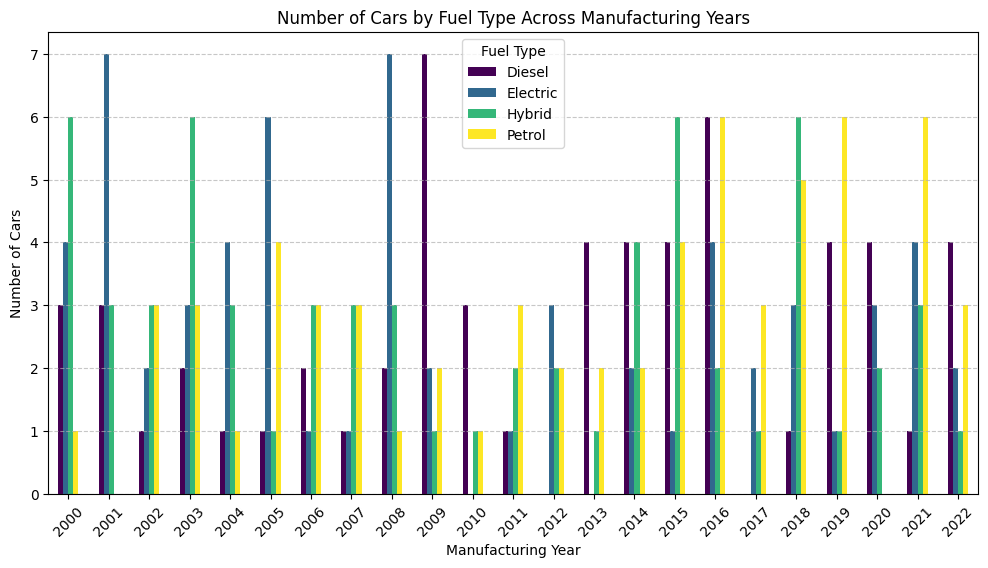

In [ ]:
fuel_year_counts = dt.groupby(["Year", "Fuel Type"]).size().unstack()

plt.figure(figsize=(12, 6))
fuel_year_counts.plot(kind="bar", stacked=False, figsize=(12, 6), colormap="viridis")

plt.title("Number of Cars by Fuel Type Across Manufacturing Years")
plt.xlabel("Manufacturing Year")
plt.ylabel("Number of Cars")
plt.xticks(rotation=45)
plt.legend(title="Fuel Type")
plt.grid(axis="y", linestyle="--", alpha=0.7)

plt.show()